#import lib

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

#load dataset

In [2]:
df = pd.read_csv('/content/trainDataset.csv')
df.head()

,id,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,2,1,4,2,0,3,1,2,0.50,0.4848,0.42,0.1940,9
1,1,4,0,9,12,0,1,1,2,0.68,0.6364,0.79,0.1642,209
2,2,2,1,4,0,0,3,1,1,0.34,0.3030,0.36,0.4179,30
3,3,2,1,6,15,0,0,0,1,0.70,0.6364,0.34,0.0000,644
4,4,4,1,10,10,0,3,1,1,0.56,0.5303,0.52,0.2985,217


In [13]:
df_test = pd.read_csv('/content/submissionDataset.csv')
df_test.head()

,id,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,3,1,6,19,0,6,0,1,0.80,0.6970,0.27,0.1940,1074.305000
1,1,1,1,1,20,1,1,0,1,0.24,0.2273,0.41,0.2239,165.648650
2,2,4,0,10,2,0,5,1,1,0.32,0.3030,0.66,0.2836,13.448290
3,3,2,1,5,19,0,2,1,1,0.78,0.7121,0.52,0.3582,1580.110700
4,4,1,0,1,0,0,4,1,1,0.26,0.2273,0.56,0.3881,5.066608


In [14]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,peak,good,mist,rain,pour
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,2.510399,0.003535,6.562351,11.579038,0.027949,3.004603,0.681381,1.426634,0.498058,0.476826,0.627472,0.189457,191.237649,0.230333,0.655651,0.262228,0.081956,0.000164
std,1.105498,1.000035,3.430356,6.925790,0.164834,2.010245,0.465960,0.639961,0.193085,0.172369,0.193316,0.122025,182.900931,0.421063,0.475175,0.439864,0.274310,0.012822
min,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,-1.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,145.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.790000,0.253700,282.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.984800,1.000000,0.850700,976.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Preprocessing data

3 type of data:


*   `id`: Useless data, remove this feature
*  `season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit`: Categorical data
* `temp`, `hum`, `windspeed`, `cnt`: Numerical data


###Remove `id`

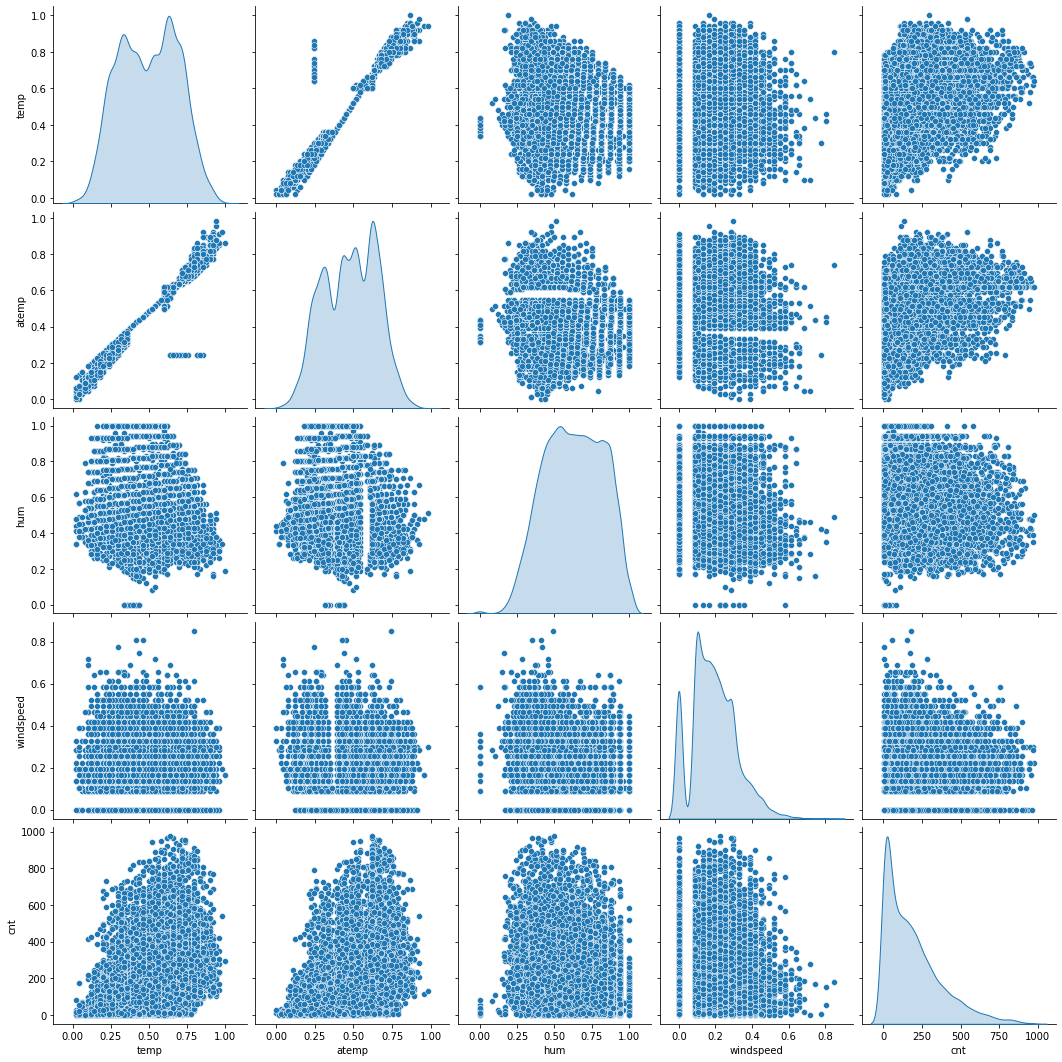

In [15]:
sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']], diag_kind='kde', height=3)

In [4]:
df = df.iloc[:,1:]
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2,1,4,2,0,3,1,2,0.50,0.4848,0.42,0.1940,9
1,4,0,9,12,0,1,1,2,0.68,0.6364,0.79,0.1642,209
2,2,1,4,0,0,3,1,1,0.34,0.3030,0.36,0.4179,30
3,2,1,6,15,0,0,0,1,0.70,0.6364,0.34,0.0000,644
4,4,1,10,10,0,3,1,1,0.56,0.5303,0.52,0.2985,217


change `yr` is -1 instead of 0 if the year is 2011

In [5]:
df[["yr"]] = np.where(df[['yr']]==0, -1, df[['yr']])
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2,1,4,2,0,3,1,2,0.50,0.4848,0.42,0.1940,9
1,4,-1,9,12,0,1,1,2,0.68,0.6364,0.79,0.1642,209
2,2,1,4,0,0,3,1,1,0.34,0.3030,0.36,0.4179,30
3,2,1,6,15,0,0,0,1,0.70,0.6364,0.34,0.0000,644
4,4,1,10,10,0,3,1,1,0.56,0.5303,0.52,0.2985,217


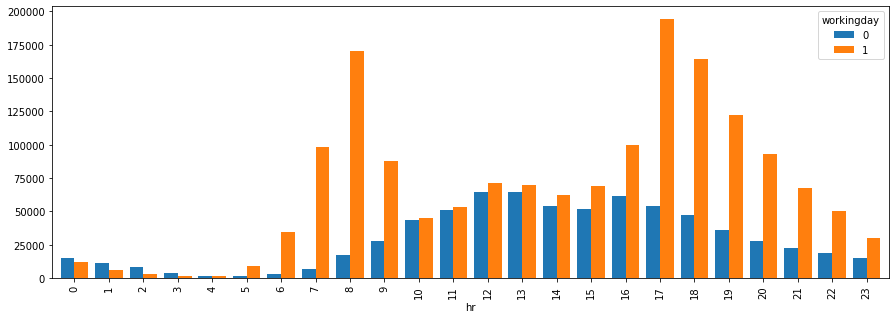

In [6]:
rush_hours = df.groupby(['hr', 'workingday'])['cnt'].agg('sum').unstack()
rush_hours.plot(kind='bar', figsize=(15,5), width=0.8)

In [7]:
rush_hours_conditions = [
                         df['workingday'].eq(1) & df['hr'].ge(7) & df['hr'].le(9),
                         df['workingday'].eq(1) & df['hr'].ge(16) & df['hr'].le(20),
                    
]
choices = [1,1]

df['peak'] = np.select(rush_hours_conditions, choices, default=0)
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,peak
0,2,1,4,2,0,3,1,2,0.50,0.4848,0.42,0.1940,9,0
1,4,-1,9,12,0,1,1,2,0.68,0.6364,0.79,0.1642,209,0
2,2,1,4,0,0,3,1,1,0.34,0.3030,0.36,0.4179,30,0
3,2,1,6,15,0,0,0,1,0.70,0.6364,0.34,0.0000,644,0
4,4,1,10,10,0,3,1,1,0.56,0.5303,0.52,0.2985,217,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2,1,4,9,0,5,1,1,0.46,0.4545,0.88,0.0896,359,1
12161,2,1,5,17,0,5,1,1,0.66,0.6212,0.34,0.1343,812,1
12162,3,-1,8,12,0,3,1,1,0.80,0.7273,0.43,0.2836,189,0
12163,1,-1,2,7,0,2,1,1,0.24,0.1970,0.65,0.4179,100,1


change `weathersit` to 4 columns:
* 1: good 
* 2: mist
* 3: rain
* 4: pour 

In [8]:
dummy_weathersit = pd.get_dummies(df['weathersit'])
dummy_weathersit = dummy_weathersit.rename(columns = {1: 'good', 2: 'mist', 3: 'rain', 4: 'pour'})

In [9]:
df = pd.concat([df, dummy_weathersit], axis=1)
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,peak,good,mist,rain,pour
0,2,1,4,2,0,3,1,2,0.50,0.4848,0.42,0.1940,9,0,0,1,0,0
1,4,-1,9,12,0,1,1,2,0.68,0.6364,0.79,0.1642,209,0,0,1,0,0
2,2,1,4,0,0,3,1,1,0.34,0.3030,0.36,0.4179,30,0,1,0,0,0
3,2,1,6,15,0,0,0,1,0.70,0.6364,0.34,0.0000,644,0,1,0,0,0
4,4,1,10,10,0,3,1,1,0.56,0.5303,0.52,0.2985,217,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2,1,4,9,0,5,1,1,0.46,0.4545,0.88,0.0896,359,1,1,0,0,0
12161,2,1,5,17,0,5,1,1,0.66,0.6212,0.34,0.1343,812,1,1,0,0,0
12162,3,-1,8,12,0,3,1,1,0.80,0.7273,0.43,0.2836,189,0,1,0,0,0
12163,1,-1,2,7,0,2,1,1,0.24,0.1970,0.65,0.4179,100,1,1,0,0,0


In [10]:
train_features = df[df.columns.difference(['cnt'])]
train_features.head()

,atemp,good,holiday,hr,hum,mist,mnth,peak,pour,rain,season,temp,weathersit,weekday,windspeed,workingday,yr
0,0.4848,0,0,2,0.42,1,4,0,0,0,2,0.50,2,3,0.1940,1,1
1,0.6364,0,0,12,0.79,1,9,0,0,0,4,0.68,2,1,0.1642,1,-1
2,0.3030,1,0,0,0.36,0,4,0,0,0,2,0.34,1,3,0.4179,1,1
3,0.6364,1,0,15,0.34,0,6,0,0,0,2,0.70,1,0,0.0000,0,1
4,0.5303,1,0,10,0.52,0,10,0,0,0,4,0.56,1,3,0.2985,1,1


In [11]:
train_labels = df['cnt']
train_labels.head()

0      9
1    209
2     30
3    644
4    217
Name: cnt, dtype: int64

In [16]:
test_features = df_test[:-1]
test_features.head()

,id,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,3,1,6,19,0,6,0,1,0.80,0.6970,0.27,0.1940,1074.305000
1,1,1,1,1,20,1,1,0,1,0.24,0.2273,0.41,0.2239,165.648650
2,2,4,0,10,2,0,5,1,1,0.32,0.3030,0.66,0.2836,13.448290
3,3,2,1,5,19,0,2,1,1,0.78,0.7121,0.52,0.3582,1580.110700
4,4,1,0,1,0,0,4,1,1,0.26,0.2273,0.56,0.3881,5.066608


In [17]:
def process_data(data_frame):
  data_frame = data_frame.iloc[:,1:]
  data_frame[["yr"]] = np.where(data_frame[['yr']]==0, -1, data_frame[['yr']])
  rush_hours_conditions = [
                         data_frame['workingday'].eq(1) & data_frame['hr'].ge(7) & data_frame['hr'].le(9),
                         data_frame['workingday'].eq(1) & data_frame['hr'].ge(16) & data_frame['hr'].le(20),
                    
  ]
  choices = [1,1]

  data_frame['peak'] = np.select(rush_hours_conditions, choices, default=0)
  dummy_weathersit = pd.get_dummies(data_frame['weathersit'])
  dummy_weathersit = dummy_weathersit.rename(columns = {1: 'good', 2: 'mist', 3: 'rain', 4: 'pour'})
  data_frame = pd.concat([data_frame, dummy_weathersit], axis=1)
  return data_frame

test_features = process_data(test_features)
test_features

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,peak,good,mist,rain,pour
0,3,1,6,19,0,6,0,1,0.80,0.6970,0.27,0.1940,1074.305000,0,1,0,0,0
1,1,1,1,20,1,1,0,1,0.24,0.2273,0.41,0.2239,165.648650,0,1,0,0,0
2,4,-1,10,2,0,5,1,1,0.32,0.3030,0.66,0.2836,13.448290,0,1,0,0,0
3,2,1,5,19,0,2,1,1,0.78,0.7121,0.52,0.3582,1580.110700,1,1,0,0,0
4,1,-1,1,0,0,4,1,1,0.26,0.2273,0.56,0.3881,5.066608,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5208,4,-1,10,11,0,3,1,3,0.54,0.5152,0.94,0.3284,30.384619,0,0,0,1,0
5209,2,1,6,10,0,3,1,1,0.82,0.7727,0.52,0.1343,181.718410,0,1,0,0,0
5210,2,1,4,9,0,6,0,2,0.38,0.3939,0.37,0.0000,109.147550,0,0,1,0,0
5211,3,1,6,12,0,0,0,1,0.80,0.6970,0.33,0.2239,415.736020,0,1,0,0,0


In [18]:
test_features = test_features[test_features.columns.difference(['cnt'])]
test_features.head()

,atemp,good,holiday,hr,hum,mist,mnth,peak,pour,rain,season,temp,weathersit,weekday,windspeed,workingday,yr
0,0.6970,1,0,19,0.27,0,6,0,0,0,3,0.80,1,6,0.1940,0,1
1,0.2273,1,1,20,0.41,0,1,0,0,0,1,0.24,1,1,0.2239,0,1
2,0.3030,1,0,2,0.66,0,10,0,0,0,4,0.32,1,5,0.2836,1,-1
3,0.7121,1,0,19,0.52,0,5,1,0,0,2,0.78,1,2,0.3582,1,1
4,0.2273,1,0,0,0.56,0,1,0,0,0,1,0.26,1,4,0.3881,1,-1


#Linear regresion using TensorFlow

###Normalizer layer

In [ ]:
norm_layer = tf.keras.layers.Normalization()
norm_layer.adapt(train_features)

###Init model

In [ ]:
simple_lr_model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(units=1)                                       
])
simple_lr_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 17)               35        
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 18        
                                                                 
Total params: 53
Trainable params: 18
Non-trainable params: 35
_________________________________________________________________


In [ ]:
simple_lr_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error'
)

In [ ]:
simple_lr_model.fit(train_features, train_labels, epochs=50, validation_split=0.2)

Epoch 1/50
305/305 [==============================] - 1s 2ms/step - loss: 56393.7266 - val_loss: 45063.5547
Epoch 2/50
305/305 [==============================] - 1s 2ms/step - loss: 39514.2734 - val_loss: 33668.2695
Epoch 3/50
305/305 [==============================] - 1s 2ms/step - loss: 30175.6152 - val_loss: 26488.9102
Epoch 4/50
305/305 [==============================] - 1s 2ms/step - loss: 23991.0586 - val_loss: 21490.9258
Epoch 5/50
305/305 [==============================] - 1s 2ms/step - loss: 19778.4473 - val_loss: 18112.9746
Epoch 6/50
305/305 [==============================] - 1s 2ms/step - loss: 16961.7637 - val_loss: 15872.5342
Epoch 7/50
305/305 [==============================] - 1s 2ms/step - loss: 15168.7041 - val_loss: 14490.5322
Epoch 8/50
305/305 [==============================] - 1s 2ms/step - loss: 14092.2832 - val_loss: 13697.3506
Epoch 9/50
305/305 [==============================] - 1s 2ms/step - loss: 13504.5664 - val_loss: 13268.5635
Epoch 10/50
305/305 [=======

In [ ]:
y_predict = simple_lr_model.predict(test_features)
y_predict

array([[420.91174 ],
       [177.73157 ],
       [  5.156784],
       ...,
       [239.80434 ],
       [364.58588 ],
       [183.41417 ]], dtype=float32)

In [ ]:
np.argwhere(y_predict < 0) #check negative values

array([[   4,    0],
       [   5,    0],
       [  10,    0],
       [  20,    0],
       [  43,    0],
       [  66,    0],
       [  82,    0],
       [  91,    0],
       [ 105,    0],
       [ 147,    0],
       [ 166,    0],
       [ 175,    0],
       [ 188,    0],
       [ 189,    0],
       [ 206,    0],
       [ 215,    0],
       [ 221,    0],
       [ 235,    0],
       [ 241,    0],
       [ 253,    0],
       [ 254,    0],
       [ 279,    0],
       [ 300,    0],
       [ 325,    0],
       [ 382,    0],
       [ 403,    0],
       [ 418,    0],
       [ 441,    0],
       [ 442,    0],
       [ 445,    0],
       [ 454,    0],
       [ 456,    0],
       [ 469,    0],
       [ 483,    0],
       [ 492,    0],
       [ 496,    0],
       [ 524,    0],
       [ 555,    0],
       [ 561,    0],
       [ 571,    0],
       [ 573,    0],
       [ 574,    0],
       [ 575,    0],
       [ 580,    0],
       [ 594,    0],
       [ 612,    0],
       [ 653,    0],
       [ 654,

### `y_predict` can be negative. I can use log transformation to avoid that.

In [ ]:
simple_lr_model.fit(train_features, np.log1p(train_labels), epochs=50, validation_split=0.2)

Epoch 1/50
305/305 [==============================] - 1s 3ms/step - loss: 3.2786 - val_loss: 0.8423
Epoch 2/50
305/305 [==============================] - 1s 2ms/step - loss: 0.8531 - val_loss: 0.8622
Epoch 3/50
305/305 [==============================] - 1s 2ms/step - loss: 0.8872 - val_loss: 0.8684
Epoch 4/50
305/305 [==============================] - 1s 2ms/step - loss: 0.9438 - val_loss: 0.8696
Epoch 5/50
305/305 [==============================] - 1s 2ms/step - loss: 2.2807 - val_loss: 1.7311
Epoch 6/50
305/305 [==============================] - 1s 2ms/step - loss: 1.1176 - val_loss: 0.8424
Epoch 7/50
305/305 [==============================] - 1s 2ms/step - loss: 0.9632 - val_loss: 0.8670
Epoch 8/50
305/305 [==============================] - 1s 2ms/step - loss: 1.1270 - val_loss: 0.8713
Epoch 9/50
305/305 [==============================] - 1s 2ms/step - loss: 1.9064 - val_loss: 0.8430
Epoch 10/50
305/305 [==============================] - 1s 2ms/step - loss: 1.9721 - val_loss: 0.8584

###When get predict values, i use exponential constant e and minus e to get 'real' predict

In [ ]:
y_predict = simple_lr_model.predict(test_features)
y_predict = np.exp(y_predict) - 1

In [ ]:
y_predict

array([[555.157   ],
       [ 47.267803],
       [ 17.274876],
       ...,
       [172.08128 ],
       [246.07318 ],
       [113.90495 ]], dtype=float32)

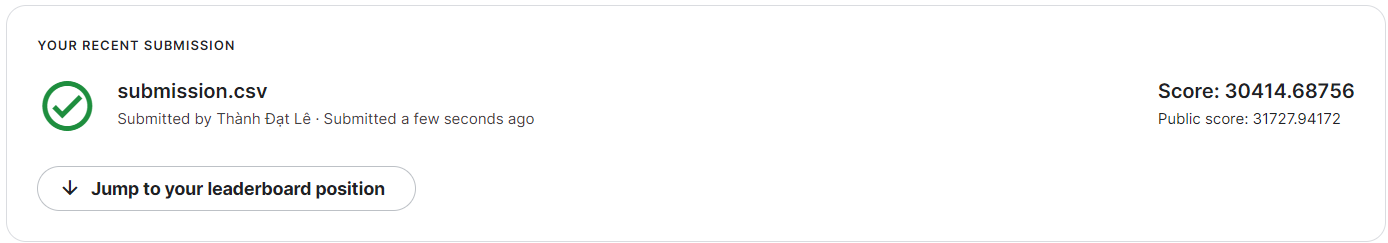

In [ ]:
df = pd.DataFrame(y_predict)
df.to_csv('out.csv')

#ANN using TensorFlow

In [ ]:
def build_nn(norm_layer):
  NN = tf.keras.Sequential([
      norm_layer,
      tf.keras.layers.Dense(units=128, activation='relu'),                                       
      tf.keras.layers.Dense(units=64, activation='relu'),                                       
      tf.keras.layers.Dense(units=1)                                       
  ])
  NN.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error'
  )

  return NN

ANN = build_nn(norm_layer)
ANN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 17)               35        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 128)               2304      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,660
Trainable params: 10,625
Non-trainable params: 35
_________________________________________________________________


In [ ]:
ANN.fit(train_features, np.log1p(train_labels), epochs=50, validation_split=0.2)

Epoch 1/50
305/305 [==============================] - 2s 5ms/step - loss: 1.0905 - val_loss: 0.5696
Epoch 2/50
305/305 [==============================] - 1s 3ms/step - loss: 0.4460 - val_loss: 0.4665
Epoch 3/50
305/305 [==============================] - 1s 2ms/step - loss: 0.3427 - val_loss: 0.2965
Epoch 4/50
305/305 [==============================] - 1s 3ms/step - loss: 0.2190 - val_loss: 0.1853
Epoch 5/50
305/305 [==============================] - 1s 3ms/step - loss: 0.1911 - val_loss: 0.1602
Epoch 6/50
305/305 [==============================] - 1s 2ms/step - loss: 0.1755 - val_loss: 0.1687
Epoch 7/50
305/305 [==============================] - 1s 2ms/step - loss: 0.1775 - val_loss: 0.2177
Epoch 8/50
305/305 [==============================] - 1s 3ms/step - loss: 0.1650 - val_loss: 0.1798
Epoch 9/50
305/305 [==============================] - 1s 2ms/step - loss: 0.1708 - val_loss: 0.1718
Epoch 10/50
305/305 [==============================] - 1s 2ms/step - loss: 0.1648 - val_loss: 0.1730

In [ ]:
y_predict = ANN.predict(test_features)
y_predict = np.exp(y_predict) - 1

In [ ]:
y_predict

array([[543.8645  ],
       [ 64.67618 ],
       [ 11.723302],
       ...,
       [198.01501 ],
       [536.472   ],
       [247.4133  ]], dtype=float32)

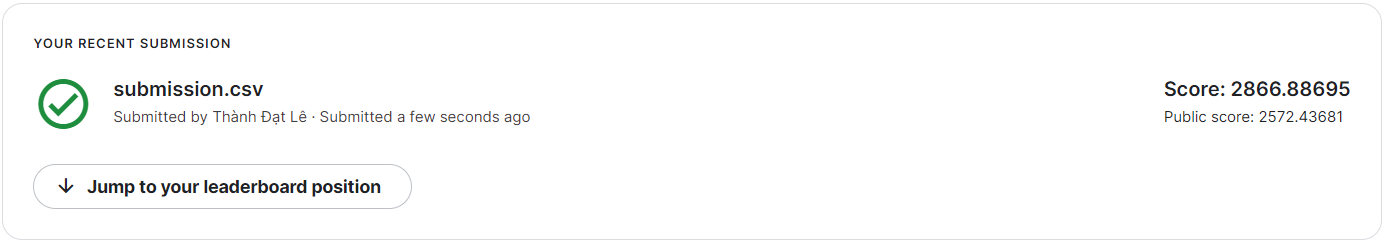

result better than simple lr 

#Try with RamdomForest using scikit-learn

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
params = {'n_estimators': 1000, 'max_depth': 12, 'random_state': 0, 'min_samples_split' : 5, 'n_jobs': -1}
regr = RandomForestRegressor(**params)
regr.fit(train_features, np.log1p(train_labels))

RandomForestRegressor(max_depth=12, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0)

In [25]:
y_predict = regr.predict(test_features)
y_predict = np.exp(y_predict) - 1
np.argwhere(y_predict < 0)

array([], shape=(0, 1), dtype=int64)

In [29]:
y_predict
y_predict = y_predict.round()

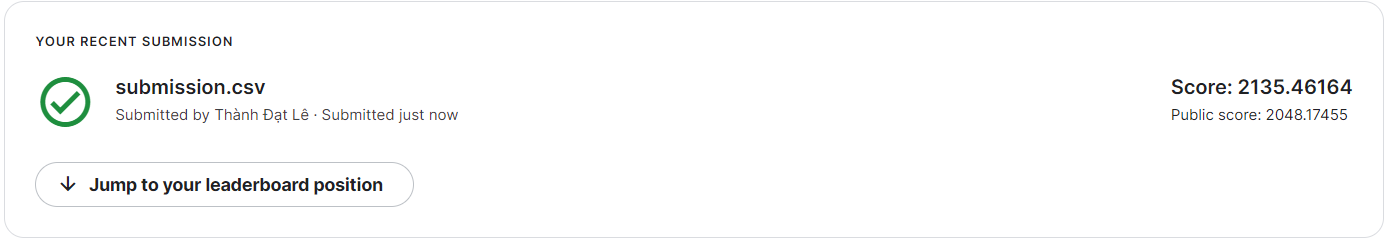

#Try with CatBoost using CatBoost API

In [32]:
!pip install catboost
import catboost as cb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.4 MB/s 


In [33]:
train_dataset = cb.Pool(train_features, np.log1p(train_labels)) 

In [34]:
catboost_model = cb.CatBoostRegressor(loss_function='RMSE',
                             colsample_bylevel=0.85, 
                             verbose=False)

grid = {'iterations': [250, 300],
        'learning_rate': [0.05, 0.07, 0.1],
        'max_depth': [10, 11, 12],
        'l2_leaf_reg': [0.2, 0.5, 0.7, 1, 3],
        'max_bin' : [100]}

catboost_model.grid_search(grid, train_dataset)


bestTest = 0.2969655017
bestIteration = 249

0:	loss: 0.2969655	best: 0.2969655 (0)	total: 1.53s	remaining: 2m 16s

bestTest = 0.2940531923
bestIteration = 248

1:	loss: 0.2940532	best: 0.2940532 (1)	total: 2.99s	remaining: 2m 11s

bestTest = 0.2971238289
bestIteration = 247

2:	loss: 0.2971238	best: 0.2940532 (1)	total: 4.42s	remaining: 2m 8s

bestTest = 0.2987190854
bestIteration = 249

3:	loss: 0.2987191	best: 0.2940532 (1)	total: 5.85s	remaining: 2m 5s

bestTest = 0.2955704029
bestIteration = 249

4:	loss: 0.2955704	best: 0.2940532 (1)	total: 7.27s	remaining: 2m 3s

bestTest = 0.2958757238
bestIteration = 249

5:	loss: 0.2958757	best: 0.2940532 (1)	total: 8.72s	remaining: 2m 2s

bestTest = 0.299100457
bestIteration = 249

6:	loss: 0.2991005	best: 0.2940532 (1)	total: 10.2s	remaining: 2m

bestTest = 0.2980351348
bestIteration = 248

7:	loss: 0.2980351	best: 0.2940532 (1)	total: 11.6s	remaining: 1m 58s

bestTest = 0.2940909028
bestIteration = 249

8:	loss: 0.2940909	best: 0.2940532 

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [37]:
y_predict = catboost_model.predict(test_features)

In [39]:
y_predict = catboost_model.predict(test_features)
y_predict = np.exp(y_predict) - 1
np.argwhere(y_predict < 0)

array([], shape=(0, 1), dtype=int64)

In [40]:
y_predict
y_predict = y_predict.round()

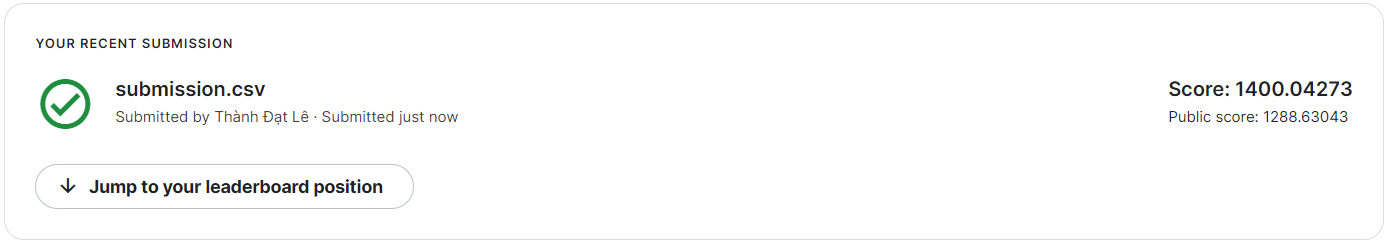